In [1]:
import pickle

In [13]:
## Loading the decoder
decoderdir = 'logs/decoder_CV_per_run/train_decoder.sav'
decoder = pickle.load(open(decoderdir, 'rb'))

In [14]:
print(decoder)

Decoder(cv=LeaveOneGroupOut(), estimator=LogisticRegression(solver='liblinear'),
        mask=<nibabel.nifti1.Nifti1Image object at 0x7faf9a552730>,
        memory=Memory(location=None), n_jobs=-1,
        param_grid={'C': [1e-05], 'max_iter': [100],
                    'multi_class': ['multinomial'], 'penalty': ['l2'],
                    'solver': ['lbfgs']},
        verbose=1)


In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [110]:
df = pd.DataFrame.from_dict(decoder.cv_scores_)
df

,caught,chase,checkpoint,close_enemy,protected_by_wall,vc_hit
0,0.875385,0.777343,0.928197,0.907205,0.808330,0.800500
1,0.943773,0.874636,0.984423,0.967930,0.848147,0.890046
2,0.932695,0.878800,0.978676,0.922199,0.836235,0.846397
3,0.868971,0.848980,0.984506,0.929363,0.813994,0.943190
4,0.915119,0.864890,0.991920,0.959434,0.828571,0.885964


/opt/anaconda3/envs/MVAP/lib/python3.8/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


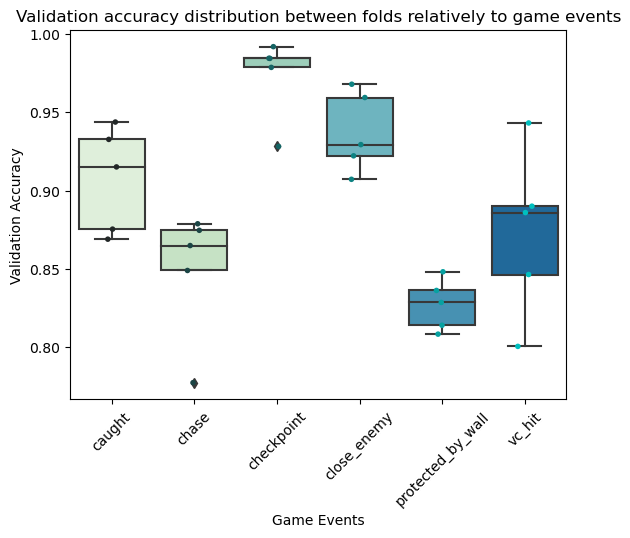

In [124]:
palette = sns.color_palette("GnBu")
sns.boxplot(df,palette = palette).set(
    xlabel='Game Events', 
    ylabel='Validation Accuracy')

sns.stripplot(data = df,  palette='dark:c',size = 4)


plt.xticks(rotation=45)
plt.title ('Validation accuracy distribution between folds relatively to game events')
plt.show()

In [187]:
graph_net=[]
tv_l1=[]
alphas = [0.001, 0.1, 1, 10, 100]
for alpha in alphas:
    path = f'logs/spacenet_CV_per_run_graph-net/trained_spacenet_{alpha}.sav'
    graph_net.append( pickle.load(open(path, 'rb'))['accuracies'])
    path_ = f'logs/spacenet_CV_per_run_tv-l1/trained_spacenet_{alpha}.sav'
    tv_l1.append(pickle.load(open(path_, 'rb'))['accuracies'])

/opt/anaconda3/envs/MVAP/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


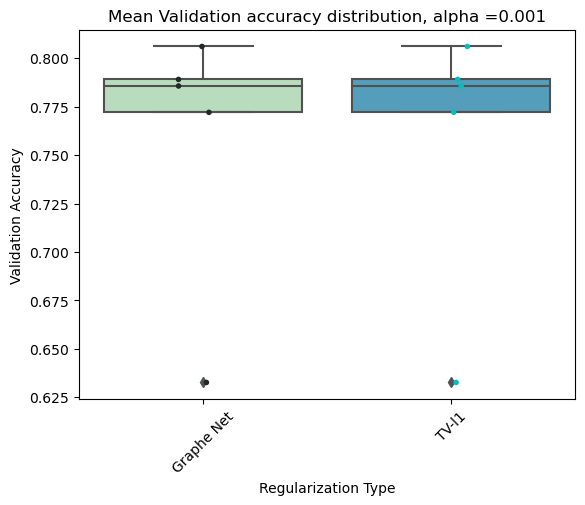

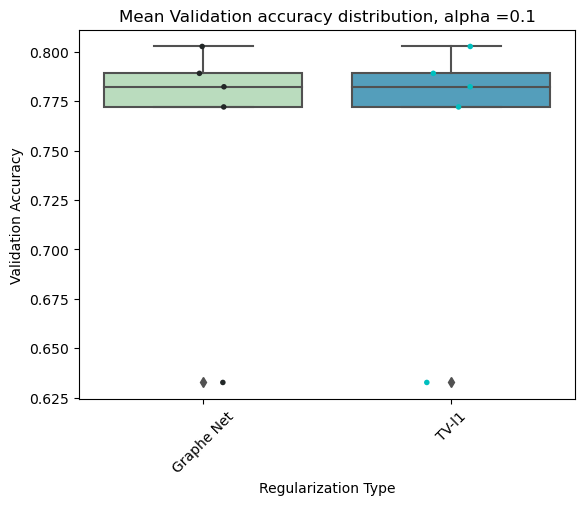

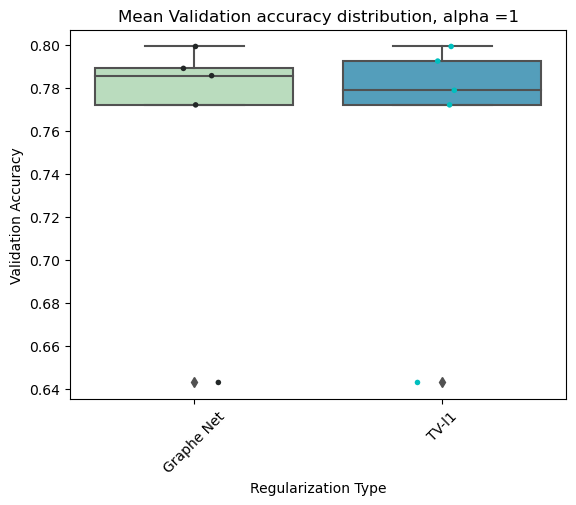

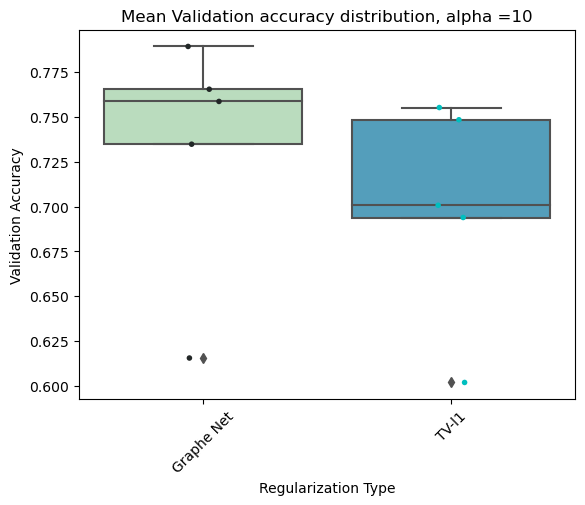

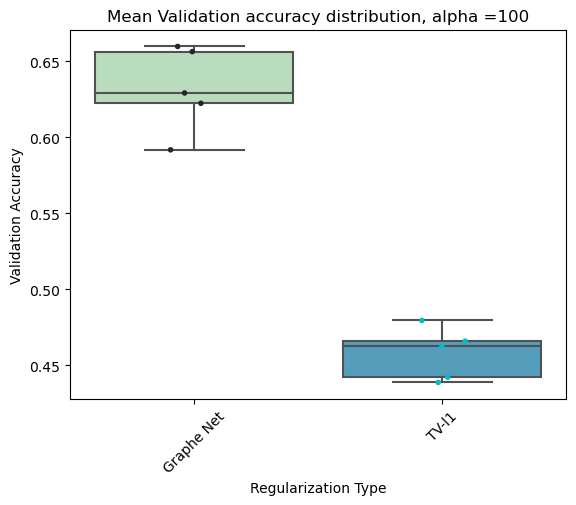

In [200]:
for i in range(0,5): 
    palette = sns.color_palette("GnBu",  n_colors=2)
    sns.boxplot(data=[graph_net[i], tv_l1[i]], palette= palette).set(
    xlabel='Regularization Type', 
    xticklabels=['Graphe Net', 'TV-l1'],
    ylabel='Validation Accuracy')
    
    sns.stripplot(data =[graph_net[i], tv_l1[i]], palette='dark:c',size = 4)
    plt.xticks(rotation=45)
    plt.title ('Mean Validation accuracy distribution, alpha ={}'.format(alphas[i]))
    plt.show()
    

Final tablea
mean acc decoder, mean accuracy best graph, mean accuracy best tvl-1